# Retrieving OpenStreetMap data

![](img/OSM_logo.png)

## What is OpenStreetMap?

OpenStreetMap (OSM) is a global collaborative (crowd-sourced) dataset and project that aims at creating a free editable map of the world containing a lot of information about our environment.
It contains data for example about streets, buildings, different services, and landuse to mention a few. You can view the map at www.openstreetmap.org. You can also sign up as a contributor if you want to edit the map.

OSM has a large userbase with more than 4 million users and over a million contributers that update actively the OSM database with 3 million changesets per day. In total OSM contains 5 billion nodes that form the basis of the digitally mapped world that OSM provides ([stats from November 2019](http://wiki.openstreetmap.org/wiki/Stats)).

OpenStreetMap is used not only for integrating the **OSM maps** as background maps to visualizations or online maps, but also for many other purposes such as **routing**, **geocoding**, **education**, and **research**. OSM is also widely used for humanitarian response e.g. in crisis areas (e.g. after natural disasters) and for fostering economic development (see more from [Humanitarian OpenStreetMap Team (HOTOSM) website](https://www.hotosm.org)).


## OSMnx

This week we will explore a Python module called [OSMnx](https://github.com/gboeing/osmnx)
that can be used to retrieve, construct, analyze, and visualize street networks from OpenStreetMap, and also retrieve data about Points of Interest such as restaurants, schools, and lots of different kind of services. It is also easy to conduct network routing based on walking, cycling or driving by combining OSMnx functionalities with a package called [NetworkX](https://networkx.github.io/documentation/stable/).

To get an overview of the capabilities of the package, see an introductory video given by the lead developer of the package, Prof. Geoff Boeing: ["Meet the developer: Introduction to OSMnx package by Geoff Boeing"](https://www.youtube.com/watch?v=Q0uxu25ddc4&list=PLs9D4XVqc6dCAhhvhZB7aHGD8fCeCC_6N).

There is also a scientific article available describing the package:

- Boeing, G. 2017. ["OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks."](https://www.researchgate.net/publication/309738462_OSMnx_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks) Computers, Environment and Urban Systems 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004

## Download and visualize OpenStreetMap data with OSMnx

One the most useful features that OSMnx provides is an easy-to-use way of retrieving [OpenStreetMap](http://www.openstreetmap.org) data (using [OverPass API](http://wiki.openstreetmap.org/wiki/Overpass_API)).

In this tutorial, we will learn how to download and visualize OSM data covering a specified area of interest: a district of Kamppi in Helsinki, Finland.

### Street network

OSMnx makes it really easy to do that as it allows you to specify an address to retrieve the OpenStreetMap data around that area. In fact, OSMnx uses the same Nominatim Geocoding API to do this, which we tested during the Lesson 2.

- Let's retrieve OpenStreetMap (OSM) data by specifying ``"Kamppi, Helsinki, Finland"`` as the place from where the data should be downloaded.


In [96]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# Specify the name that is used to seach for the data
place_name = "Kamppi, Helsinki, Finland"

# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)

- Check the data type of the graph:

In [97]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

Okey, as we can see the data that we retrieved is a special data object called `networkx.classes.multidigraph.MultiDiGraph`. A DiGraph is a data type that stores nodes and edges with optional data, or attributes. What we can see here is that this data type belongs to a Python module called [networkx](https://networkx.github.io/documentation/stable/) that can be used to create, manipulate, and study the structure, dynamics, and functions of complex networks. Networkx module contains algorithms that can be used to calculate [shortest paths](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.shortest_paths.html)
along road networks using e.g. [Dijkstra's](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) or [A\* algorithm](https://en.wikipedia.org/wiki/A*_search_algorithm).

- Let's see how our street network looks like. It is easy to visualize the graph with OSMnx with `plot_graph()` function. The function utilizes Matplotlib for visualizing the data,
hence as a result it returns a matplotlib figure and axis objects:


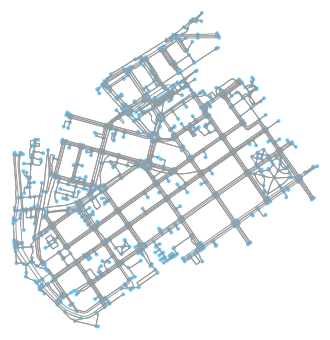

In [98]:
# Plot the streets
fig, ax = ox.plot_graph(graph)

Great! Now we can see that our graph contains the nodes (blue circles) and the edges (gray lines) that connects those nodes to each other.

### Place polygon

Let's also plot the Polygon that represents our area of interest (Kamppi, Helsinki). We can retrieve the Polygon geometry using the [gdf_from_place()](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.core.gdf_from_place) -function.

- Retrieve the extent of our location:

In [99]:
area = ox.gdf_from_place(place_name)

As the name of the function already tells us, `gdf_from_place()`returns a GeoDataFrame based on the specified place name query.

- Check the data type:

In [100]:
type(area)

geopandas.geodataframe.GeoDataFrame

- Check the data:

In [101]:
area

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,"POLYGON ((24.92064 60.16483, 24.92069 60.16447...","Kamppi, Southern major district, Helsinki, Hel...",60.172075,60.160469,24.943453,24.920642


- Plot the area:

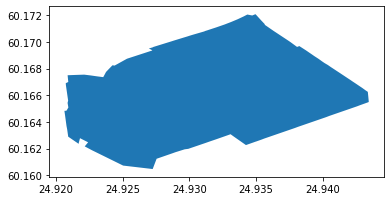

In [102]:
area.plot()

### Building footprints

It is also possible to retrieve other types of OSM data features with OSMnx such as buildings or points of interest (POIs). Let's download the buildings with `OSMnx` [footprints_from_place()](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.footprints) -function (same as `buildings_from_place` method in OSMnx<0.9) and plot them on top of our street network in Kamppi. 

- Retrieve buildings from the area:

In [103]:
buildings = ox.footprints_from_place(place_name)

*Note, you can also get other types of footprints using the parameter `footprint_type` (default is "buildings").*

- Check how many building footprints we received:

In [104]:
len(buildings)

431

Buildings GeoDataFrame contains several polygons.

- Check the first rows:

In [105]:
buildings.head(3)

,nodes,addr:city,addr:country,addr:housenumber,addr:street,building,name,name:fi,name:ko,name:sv,...,access,covered,area,members,type,brand,building:part,ele,electrified,addr:unit
8035238,"[60069605, 60069615, 60275530, 1036979252, 105...",Helsinki,FI,22-24,Mannerheimintie,public,Lasipalatsi,Lasipalatsi,라시팔라치,Glaspalatset,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8042297,"[1378950415, 1378950417, 1378950418, 319515866...",Helsinki,FI,2,Runeberginkatu,yes,Radisson Blu Royal,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14797170,"[146125363, 3203698292, 3203698293, 3203698294...",Helsinki,FI,10,Lapinlahdenkatu,school,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As you can see, there are several columns in the buildings-layer. Each column contains information about a spesific tag that OpenStreetMap contributors have added. Each tag consists of a key (the column name), and several potential values (for example `building=yes` or `building=school`). Read more about tags and tagging practices in the [OpenStreetMap wiki](https://wiki.openstreetmap.org/wiki/Tags). 

In [12]:
buildings.columns

Index(['nodes', 'addr:city', 'addr:country', 'addr:housenumber', 'addr:street',
       'building', 'name', 'name:fi', 'name:ko', 'name:sv', 'start_date',
       'url', 'wikidata', 'wikipedia', 'geometry', 'addr:postcode', 'bar',
       'email', 'fax', 'internet_access', 'internet_access:fee', 'phone',
       'smoking', 'tourism', 'website', 'operator', 'source', 'architect',
       'building:levels', 'landuse', 'suojelumerkintä', 'layer', 'ref',
       'fixme', 'last_full_renovation', 'roof:levels',
       'building:maintenance:operator', 'name:local', 'levels', 'old_name',
       'created_by', 'omistusasuntoja', 'building:material', 'roof:shape',
       'building:colour', 'roof:colour', 'name:en', 'name:fr', 'alt_name',
       'note', 'short_name', 'was:building', 'was:guard:operator',
       'wheelchair', 'building:min_level', 'amenity', 'cuisine', 'historic',
       'inscription', 'tomb', 'addr:housename', 'opening_hours', 'shop',
       'toilets:wheelchair', 'name:da', 'name:nn', '

### Points-of-interest

OSMnx has a nice function called [ox.pois_from_place()](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.pois.pois_from_place) that can be used retrieve specific points-of-interest (POIs) from OpenStreetMap based on their amenity-tag. We can, for excample, retrieve all points with a tag `amenity=restaurant`, by passing an argument to the `amenities` paremeter. We could also retrieve several POI categories by passing a list of [OSM amenity tag values](https://wiki.openstreetmap.org/wiki/Key:amenity) to the function. 

- Let's retrieve restaurants that are located in our area of interest:

In [106]:
# Retrieve restaurants
restaurants = ox.pois_from_place(place_name, amenities=['restaurant'])

# How many restaurants do we have?
len(restaurants)

152

As we can see, there are quite many restaurants in the area.

- Let's explore what kind of attributes we have in our restaurants GeoDataFrame:

In [14]:
# Available columns
restaurants.columns

Index(['osmid', 'geometry', 'addr:city', 'addr:country', 'addr:housenumber',
       'addr:postcode', 'addr:street', 'amenity', 'cuisine', 'name', 'phone',
       'website', 'wheelchair', 'element_type', 'toilets:wheelchair',
       'created_by', 'outdoor_seating', 'fixme', 'opening_hours', 'email',
       'internet_access', 'internet_access:fee', 'opening_hours:brunch',
       'diet:vegetarian', 'name:fi', 'name:zh', 'short_name', 'takeaway',
       'contact:website', 'diet:vegan', 'name:ru', 'operator', 'smoking',
       'wheelchair:description', 'level', 'contact:phone', 'source',
       'entrance', 'addr:housename', 'note', 'address', 'brunch',
       'contact:foursquare', 'contact:yelp', 'ref:vatin', 'delivery', 'url',
       'lunch:menu', 'reservation', 'room', 'toilets', 'capacity',
       'access:dog', 'shop', 'opening_hours:lunch_buffet', 'is_in', 'wikidata',
       'alt_name', 'contact:email', 'established', 'description', 'name:sv',
       'floor', 'name:en', 'lunch', 'descri

Wow, there is quite a lot of information related to the POIs. One of the useful ones might be for example the `name`, `address information` and `opening_hours` information:

In [107]:
# Select some useful cols and print
cols = ['name', 'opening_hours', 'addr:city', 'addr:country', 
        'addr:housenumber', 'addr:postcode', 'addr:street', 'diet:vegetarian']
# Print only selected cols
restaurants[cols].head(10)

,name,opening_hours,addr:city,addr:country,addr:housenumber,addr:postcode,addr:street,diet:vegetarian
60062502,Kabuki,NaN,Helsinki,FI,12,00180,Lapinlahdenkatu,NaN
62965963,Empire Plaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76617692,Johan Ludvig,NaN,Helsinki,FI,NaN,NaN,NaN,NaN
76624339,Ravintola Rivoletto,Mo-Th 11:00-23:00; Fr 11:00-24:00; Sa 15:00-24...,Helsinki,FI,38,00120,Albertinkatu,NaN
76624351,Pueblo,NaN,Helsinki,FI,NaN,NaN,Eerikinkatu,NaN
76627823,Atabar,NaN,Helsinki,FI,NaN,NaN,Eerikinkatu,NaN
89074039,Papa Albert,"Mo-Th 10:00-14:00, 17:30-22:00; Fr 11:00-23:00...",Helsinki,FI,30,00120,Albertinkatu,NaN
151006260,Ravintola China,Mo-Fr 11:00-23:00; Sa-Su 12:00-23:00; PH off,Helsinki,FI,25,00100,Annankatu,yes
151006483,Tony's deli + Street Bar,NaN,7,FI,7,00120,Bulevardi,NaN
151006932,Haru Sushi,Mo-Fr 11:00-21:00; Sa 12:00-21:00; Su 13:00-21:00,Helsinki,FI,30,00120,Fredrikinkatu,NaN


As we can see, there exists a lot of useful information about restaurants that can be retrieved easily with OSMnx. Also, if some of the information need updating, you can go over to www.openstreetmap.org and edit the source data! :)

### Graph to GeoDataFrame

We can now plot all these different OSM layers by using the familiar `plot()` function of Geopandas. As you might remember, the street network data is not a GeoDataFrame (it is `networkx.MultiDiGraph`). Luckily, OSMnx provides a convenient function `graph_to_gdfs()` that can convert the graph into two separate GeoDataFrames where the first one contains the information about the nodes and the second one about the edge.

- Let's extract the nodes and edges from the graph as GeoDataFrames:

In [108]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

In [109]:
nodes.head()

,y,x,osmid,highway,ref,geometry
3216400385,60.167552,24.934005,3216400385,turning_circle,NaN,POINT (24.93400 60.16755)
1372233731,60.162290,24.929274,1372233731,crossing,NaN,POINT (24.92927 60.16229)
319885318,60.165072,24.925487,319885318,NaN,NaN,POINT (24.92549 60.16507)
1005744134,60.161622,24.924423,1005744134,NaN,NaN,POINT (24.92442 60.16162)
3216400394,60.167662,24.933920,3216400394,NaN,NaN,POINT (24.93392 60.16766)


In [58]:
edges.head()

,u,v,key,osmid,name,highway,maxspeed,oneway,length,geometry,lanes,service,tunnel,junction,access,bridge,ref
0,3216400385,301360890,0,15240373,Kansakoulukuja,residential,30,False,13.177,"LINESTRING (24.93400 60.16755, 24.93393 60.167...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1372233731,298367080,0,86533507,NaN,footway,NaN,False,6.925,"LINESTRING (24.92927 60.16229, 24.92917 60.16225)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1372233731,292859610,0,15103120,NaN,primary_link,30,True,33.874,"LINESTRING (24.92927 60.16229, 24.92930 60.162...",2,NaN,NaN,NaN,NaN,NaN,NaN
3,1372233731,4430643601,0,"[154412960, 86533507]",NaN,footway,NaN,False,12.489,"LINESTRING (24.92927 60.16229, 24.92941 60.162...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1372233731,311043714,0,86533509,Hietalahdenkatu,primary,30,True,38.768,"LINESTRING (24.92927 60.16229, 24.92938 60.162...",2,NaN,NaN,NaN,NaN,NaN,NaN


Nice! Now, as we can see, we have our graph as GeoDataFrames and we can plot them using the same functions and tools as we have used before.

<div class="alert alert-info">

**Note**

There are also other ways of retrieving the data from OpenStreetMap with OSMnx such as passing a Polygon to extract the data from that area, or passing Point coordinates and retrieving data around that location with specific radius. Take a look of this [tutorial to find out how to use those features of OSMnx](https://github.com/gboeing/osmnx-examples/blob/master/notebooks/01-overview-osmnx.ipynb).


</div>

### Plotting the data

- Let's create a map out of the streets, buildings, restaurants, and the area Polygon but let's exclude the nodes (to keep the figure clearer).

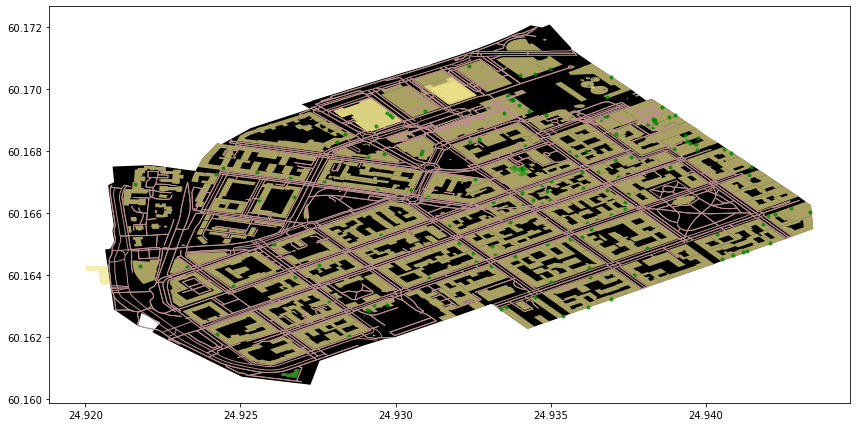

In [110]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='green', alpha=0.7, markersize=10)
plt.tight_layout()

Cool! Now we have a map where we have plotted the restaurants, buildings, streets and the boundaries of the selected region of 'Kamppi' in Helsinki. And all of this required only a few lines of code. Pretty neat! 


As a final step, we might want to re-project the layers to a local projection for plotting. Here, we will use the tools we already know, namely `pyproj CRS`. In the latter part of this lesson we will learn how to use OSMnx to re-project our data to UTM coordinates.

- Re-project the layers to epsg:3067

In [111]:
from pyproj import CRS

# Set projection
projection = CRS.from_epsg(3067)

# Re-project layers
area = area.to_crs(projection)
edges = edges.to_crs(projection)
buildings = buildings.to_crs(projection)
restaurants = restaurants.to_crs(projection)

- Create a new plot with the re-projected layers:

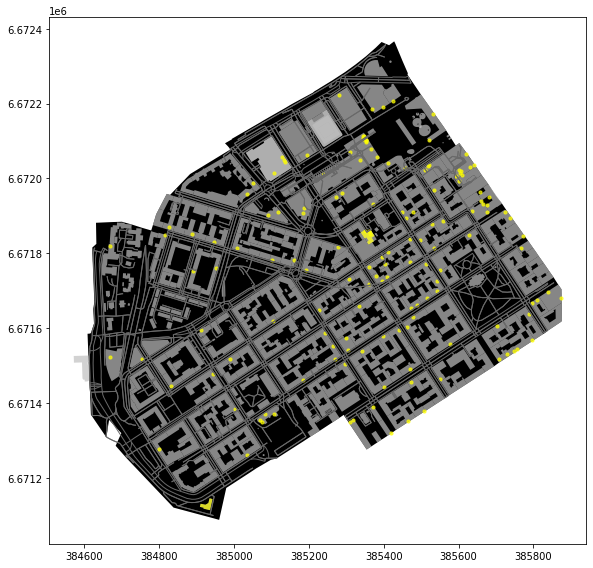

In [112]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

<div class="alert alert-info">

**Task**

Retrieve OpenStreetMap data from some other area! Download these elements using OSMnx functions from your area of interest:
    
- Extent of the area using `gdf_from_place()`
- Street network using `graph_from_place()`, and convert to gdf using `ox.graph_to_gdfs()`
- Building footprints using `ox.footprints_from_place()`
    
*Note, the larger the area you choose, the longer it takes to retrieve data from the API! Use parameter `network_type=drive` to limit the graph query to filter out un-driveable roads.*

</div>

In [71]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# Specify the name that is used to seach for the data
wdst_place_name = "Woodstock, City of Cape Town, South Africa"

# Fetch OSM street network from the location
wdst = ox.graph_from_address(wdst_place_name)

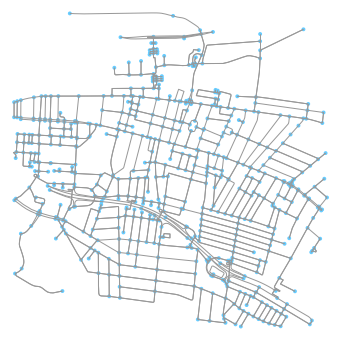

In [72]:
# Plot the streets
fig, ax = ox.plot_graph(wdst)

In [81]:
wdst_area = ox.gdf_from_place(wdst_place_name)

In [82]:
wdst_area

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,"POLYGON ((18.43942 -33.93323, 18.43952 -33.933...","Woodstock, Cape Town, City of Cape Town, Weste...",-33.919452,-33.940501,18.460599,18.439424


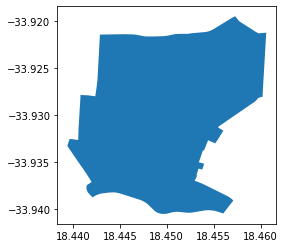

In [83]:
wdst_area.plot()

In [84]:
wdst_buildings = ox.footprints_from_place(wdst_place_name)

In [85]:
print(len(wdst_buildings))

184


In [90]:
# Retrieve restaurants
wdst_restaurants = ox.pois_from_place(place_name, amenities=['restaurant'])
wdst_restaurants.head(6)

,osmid,geometry,addr:housenumber,addr:postcode,addr:street,amenity,name,opening_hours,phone,website,...,cuisine,facebook,name:en,name:af,addr:city,diet:vegan,diet:vegetarian,building,nodes,smoking
3266855070,3266855070,POINT (18.45711 -33.92756),375,7915,Albert Road,restaurant,The Test Kitchen,"Tu-Sa 12:30-13:30, 19:00-21:30",+27214472337,http://www.thetestkitchen.co.za/home/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4280808901,4280808901,POINT (18.45340 -33.92733),250,7915,Albert Road,restaurant,Bread,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4280809890,4280809890,POINT (18.45015 -33.92695),160,7925,Albert Road,restaurant,The Fat Cactus,NaN,NaN,http://www.fatcactus.co.za,...,mexican,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4514825395,4514825395,POINT (18.45568 -33.92760),300,NaN,Albert Road,restaurant,Raw and Roxy,NaN,NaN,NaN,...,NaN,https://www.facebook.com/rawandroxy/,Raw and Roxy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4677347889,4677347889,POINT (18.45739 -33.92727),373-375,7915,Albert Road,restaurant,The Pot Luck Club,"Mo-Sa 12:30-14:30, 18:00-22:30; Su 11:00-15:00",+27214470804,NaN,...,NaN,NaN,The Pot Luck Club,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4712134025,4712134025,POINT (18.45366 -33.92757),NaN,NaN,NaN,restaurant,Woodstock Grill & Tab,NaN,NaN,https://woodstockgrill.co.za/,...,NaN,NaN,Woodstock Grill & Tap,Woodstock Grill & Tap,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# Select some useful cols and print
cols = ['name', 'opening_hours', 'addr:city',
        'addr:housenumber', 'addr:postcode', 'addr:street', 'diet:vegetarian', 'diet:vegan']
# Print only selected cols
vegan = wdst_restaurants['diet:vegan']
vegetarian = wdst_restaurants['diet:vegetarian']
vegetarian.head()
#wdst_restaurants[cols].head(10)

3266855070    NaN
4280808901    NaN
4280809890    NaN
4514825395    NaN
4677347889    NaN
Name: diet:vegetarian, dtype: object

In [93]:
# Retrieve nodes and edges
wdst_nodes, wdst_edges = ox.graph_to_gdfs(cpt)

TypeError: no numeric data to plot

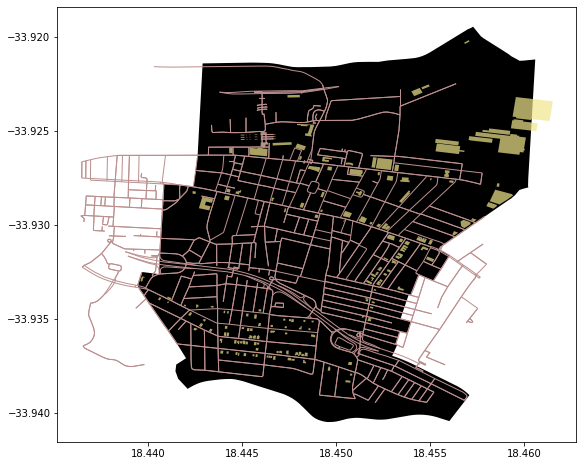

In [95]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
wdst_area.plot(ax=ax, facecolor='black')

# Plot street edges
wdst_edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
wdst_buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot restaurants
vegan.plot(ax=ax, color='green', alpha=0.7,  markersize=10)
vegaterian.plot(ax=ax, color='green', alpha=0.7, markersize=10)
plt.tight_layout()

### Extra: Park polygons
Notice that we can also retrieve other types of footprints from OpenStreetMap by specifying the `footprint_type` when using functions from the OSMnx [footprints module](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.footprints). `buildings` is the default value for this parameter, but we can also pass other OpenStreetMap tag keys.

Let's try to fetch all public parks in the Kamppi area. In OpenStreetMap, parks are often tagged as `leisure=park` (also other tags might be used, such as `landuse=recreation_ground`,`landuse=grass`, see OpenStreetMap, and OSM wiki for more details).

- We need to start by fetching all footprints from the tag `leisure`:

In [114]:
leisure = ox.footprints_from_place(place_name, footprint_type="leisure")

- let's check the data:

In [115]:
leisure.head(3)

,nodes,leisure,geometry,name,name:fi,name:sv,hoitoluokitus_viheralue,source,wikidata,wikipedia,access,barrier,alt_name,loc_name,sport,colour,fixme,mooring,short_name,short_name:sv
8042256,"[292719496, 1001543836, 1037987967, 1001544060...",park,"POLYGON ((24.93566 60.17132, 24.93566 60.17130...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8042613,"[552965718, 293390264, 295056669, 256264975, 1...",park,"POLYGON ((24.93701 60.16947, 24.93627 60.16919...",Simonpuistikko,Simonpuistikko,Simonsskvären,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15218362,"[144181223, 150532964, 150532958, 150532966, 1...",park,"POLYGON ((24.92330 60.16499, 24.92323 60.16500...",Työmiehenpuistikko,Työmiehenpuistikko,Arbetarparken,A2,survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Check all values for the column `leisure`:

In [116]:
leisure["leisure"].value_counts()

park          15
pitch          8
playground     6
dog_park       2
flowerbed      1
garden         1
marina         1
Name: leisure, dtype: int64

- select all park polygons (here, selecting both "park" and "playground"):

In [117]:
parks = leisure[leisure["leisure"].isin(["park","playground"])]

- plot the parks:

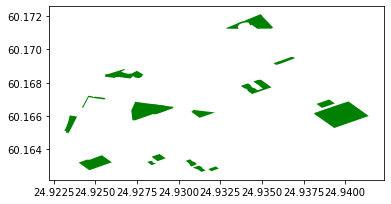

In [118]:
parks.plot(color="green")

- Finally, we can re-project the park polygons and add them to our map:

In [119]:
parks = parks.to_crs(projection)

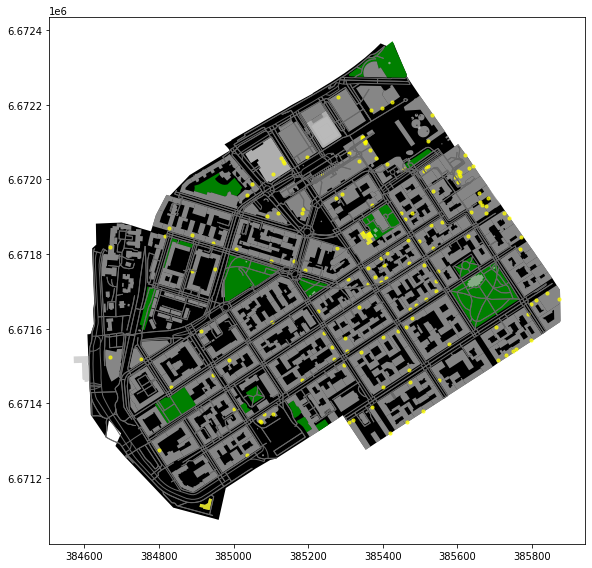

In [120]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot the parks
parks.plot(ax=ax, facecolor="green")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()